# Graph generator functions

Below you can find a few functions to create bipartite graphs with a certain degree distribution on the output layer, and uniform degree distribution the input layer.     

**Note:** since the output layer degree sequence is built randomly it might be that the average degree is not integer, and this will result in small fluctuations of the degrees on the input layer, e.g. if the average degree is close to 3.1, most input nodes will have degree 3, but a few will have degree 4, since there are too many edges to assign.  
If this is unacceptable, I provide a function to force the regularity of the input layer degrees, at the cost of small perturbations of the given degree sequence for the output layer. 

All the functions below work as follows:
1. they produce a degree sequence (or taking one if given);
2. they produce the input layer sequence by looking for the most regular possible one;
3. they attach stubs on the two layers to obtain a bipartite graph;

The functions are givena as part of a Python script/module called **IGTools.py**.  
The produced bipartite graphs are equipped with a node attribute describing whether a node is an output node (**0**) or input node (**1**).  


In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import IGtools as igt

Probably, the simplest example is a bipartite graph with Poissonian distributed degrees on the output layer. 
This can be easily obtained by creating an Erdos-Renyi graph with given number of nodes $N$ per layer and link probability $p$:

In [9]:
import networkx as nx
def create_pretty_bg_layout(g):
    pos = {};
    N = g.number_of_nodes()/2;
    lay = nx.get_node_attributes(g,'bipartite');
    pos = dict(zip(g.nodes(), zip(np.array(range(len(g.nodes())))%N, [1-lay[x] for x in g.nodes()])))
    return pos;

def force_regular_inputs(g):
    gg = g.copy();
    import random;
    N = g.number_of_nodes()/2;
    regular_degree = g.number_of_edges()/N;
    for i in range(N,2*N):
        while gg.degree(i)>regular_degree:
            chosen_nei = random.choice(gg.neighbors(i));
            gg.remove_edge(i,chosen_nei);
    return gg;

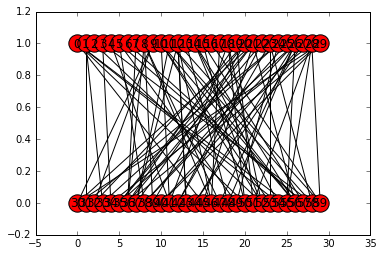

In [35]:
g = igt.create_ER_bipartite_graph(30,0.1)
nx.draw_networkx(g,create_pretty_bg_layout(g))

The same thing can be done for a power law taken from a Barabasi-Albert network growth process, resulting in a power law exponent of -3 for the degree distribution.   
In this case, the parameters for the function are the layer size and the number $m$ of edges to add at each step.  

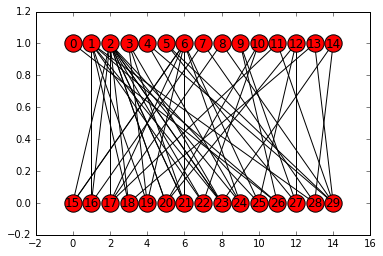

In [5]:
g = igt.create_BA_bipartite_graph(15,2)
nx.draw_networkx(g,create_pretty_bg_layout(g))

For a general degree sequence, one case use the following function mm create the desired bipartite graph:

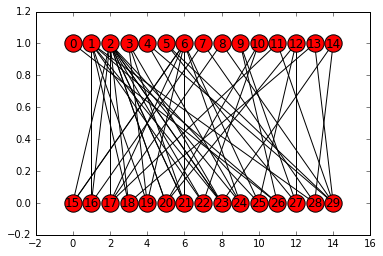

In [6]:
degseq = np.random.randint(1,10,20)
igt.create_configuration_model_graph(degseq)
nx.draw_networkx(g,create_pretty_bg_layout(g))

Finally, if it is possible to use the Chung-Lu model, where the given sequence is an expected degree sequence, rather than an exact one:  

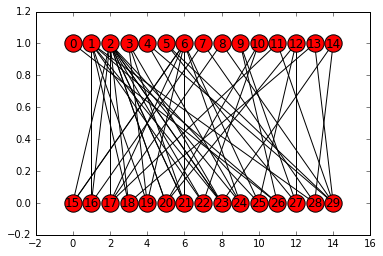

In [7]:
degseq = np.random.randint(1,10,20)
igt.create_expected_degree_graph(degseq)
nx.draw_networkx(g,create_pretty_bg_layout(g))